In [479]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
import platform
import zipfile
import os


In [70]:
system = platform.system()

def get_real_path(link_path):
    if system == "Windows":
        import win32com.client
        shell = win32com.client.Dispatch("WScript.Shell")
        return str(shell.CreateShortCut(link_path).Targetpath)
    else:
        return path.realpath(link_path)


In [71]:
def total_to_per_persona(total_df, personas_counts_df, scenarios, index):
    result = total_df.copy(deep=True)
    for persona in index:
        for scenario in scenarios:
            if personas_counts_df.loc[persona][scenario] == 0:
                result.loc[persona][scenario] = 0
            else:
                old_value = total_df.loc[persona][scenario]
                nb = personas_counts_df.loc[persona][scenario]
                new_value = old_value / nb
                result.loc[persona, scenario] = new_value
    return result

In [72]:
inputs_path = get_real_path("data/raw/inputs")
outputs_path = get_real_path("data/raw/outputs")

In [73]:
scenarios = ["s{}".format(i) for i in range(9)]

persons_csv_paths = {s: path.join(inputs_path, "idf_{}_persons.csv".format(s)) for s in scenarios}

# The paths below should point to directories
scenarios_outputs_folder_names = {"s0": "s0", 
                                  "s1": "s1",
                                  "s2": "s2",
                                  "s3": "s3",
                                  "s4": "s4",
                                  "s5": "s5",
                                  "s6": "s6",
                                  "s7": "s7",
                                  "s8": "s8",
                                 }

scenarios_outputs = {s: path.join(outputs_path, 
                    scenarios_outputs_folder_names[s]) for s in scenarios}
persons = dict()
for s in scenarios:
    persons[s] = pd.read_csv(persons_csv_paths[s], sep=";")

In [74]:
personas = set()
for s in scenarios:
    personas.update(pd.unique(persons[s]["persona"].values.ravel()))
    
personas_counts = pd.DataFrame(index=list(personas), columns=scenarios)
for p in personas:
    for s in scenarios:
        try:
            personas_counts.loc[p][s] = persons[s]["persona"].value_counts()[p]
        except KeyError:
            personas_counts.loc[p][s] = 0

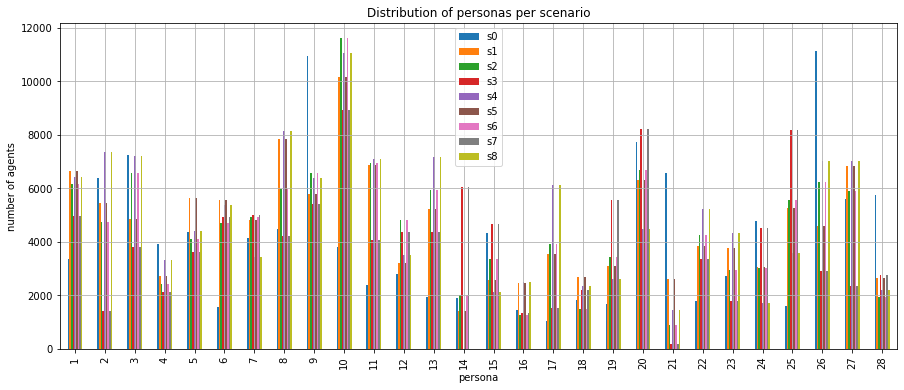

In [75]:
personas_counts.plot(kind="bar", grid=True, figsize=(15,6), title="Distribution of personas per scenario", xlabel="persona", ylabel="number of agents")
plt.show()

## Read csv files from zip file and save individually in folders

In [322]:
# define files to be used from zip files
input_files = ['eqasim_trips.csv','eqasim_pt.csv','eqasim_legs.csv']

In [324]:
# # only when input data has changed
# for s in scenarios:
#     # create folders s0-sn if not existing yet
#     s_path = f'data/raw/outputs/{s}' 
#     if not os.path.exists(s_path):
#         os.makedirs(s_path)
    
#     # read and write files from zip to normal folder
#     for inf in input_files:
#         with zipfile.ZipFile(f'data/raw/outputs/{s}.zip', 'r') as zip_file:
#             with zip_file.open(inf) as file:
#                 df = pd.read_csv(file, sep=";")

#                 df.to_csv(f'data/raw/outputs/{s}/{inf}', index=False)

In [282]:
# # process to replace semicolon with comma for s5-s8 until replaced with proper zips
# scen_temp = ['s5','s6','s7','s8']
# for s in scen_temp:
#     for inf in input_files:
#         df = pd.read_csv(f'data/raw/outputs/{s}/{inf}', sep=";")
#         df.to_csv(f'data/raw/outputs/{s}/{inf}', index=False)

In [305]:
# # convert semicolon and comma
# df = pd.read_csv('data/raw/outputs/s8/eqasim_trips.csv', sep=";")
# df.to_csv('data/raw/outputs/s8/eqasim_trips.csv', index=False)

## Start here if same simulations as before

In [367]:
# when no changes in data
data = {}
for s in scenarios:
    for inf in input_files:
        data[(s, inf)] = pd.read_csv(f'data/raw/outputs/{s}/{inf}', sep=",")

In [369]:
data['s4','eqasim_trips.csv']

,person_id,person_trip_id,origin_x,origin_y,destination_x,destination_y,departure_time,travel_time,vehicle_distance,routed_distance,mode,preceding_purpose,following_purpose,returning,euclidean_distance,origin_scope,destination_scope,trip_scope
0,3369357,0,672127.215614,6.849653e+06,672127.215614,6.849653e+06,12828.0,0.0,0.000000,0.000000,walk,work,work,False,0.000000,inside,NaN,inside
1,5747518,0,665132.003964,6.844292e+06,665075.736362,6.844356e+06,12874.0,96.0,0.000000,115.776879,walk,home,leisure,False,85.251351,inside,NaN,inside
2,9031997,0,653151.325225,6.854457e+06,653151.325225,6.854457e+06,13076.0,0.0,0.000000,0.000000,car,work,work,False,0.000000,inside,NaN,inside
3,12340762,0,663360.418141,6.875824e+06,663360.418141,6.875824e+06,13253.0,0.0,0.000000,0.000000,car,work,work,False,0.000000,inside,NaN,inside
4,900188,0,651582.293041,6.865473e+06,651899.165571,6.866524e+06,13057.0,277.0,1608.452767,1608.452767,car,home,work,False,1097.640623,inside,NaN,inside
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470820,4549710,3,630042.723108,6.847421e+06,620851.956738,6.878330e+06,73041.0,34669.0,0.000000,41603.057412,walk,other,home,True,32246.118479,inside,NaN,inside
470821,12142499,5,653927.867136,6.861570e+06,661577.576711,6.888760e+06,94991.0,12794.0,0.000000,39662.982440,bike,work,home,True,28244.759060,inside,NaN,inside
470822,13230623,6,648049.077801,6.840582e+06,648564.209840,6.840280e+06,107235.0,622.0,0.000000,746.884300,walk,shop,home,True,597.363548,inside,NaN,inside
470823,5665774,4,647645.796241,6.859523e+06,657591.718363,6.842191e+06,86244.0,21619.0,0.000000,25943.475458,walk,leisure,home,True,19983.201963,inside,NaN,inside


In [385]:
# Renaming drt trips with 99999, followed by car id
s5 = pd.read_csv('data/raw/outputs/s5/eqasim_trips.csv', sep=",")
s6 = pd.read_csv('data/raw/outputs/s6/eqasim_trips.csv', sep=",")
s7 = pd.read_csv('data/raw/outputs/s7/eqasim_trips.csv', sep=",")
s8 = pd.read_csv('data/raw/outputs/s8/eqasim_trips.csv', sep=",")
s5['person_id'] = s5['person_id'].apply(lambda x: f"99999{x.split('_')[-1]}" if isinstance(x, str) and x.startswith('vehicle_drt_') else x)
s6['person_id'] = s6['person_id'].apply(lambda x: f"99999{x.split('_')[-1]}" if isinstance(x, str) and x.startswith('vehicle_drt_') else x)
s7['person_id'] = s7['person_id'].apply(lambda x: f"99999{x.split('_')[-1]}" if isinstance(x, str) and x.startswith('vehicle_drt_') else x)
s8['person_id'] = s8['person_id'].apply(lambda x: f"99999{x.split('_')[-1]}" if isinstance(x, str) and x.startswith('vehicle_drt_') else x)
s5.to_csv('data/raw/outputs/s5/eqasim_trips.csv', index=False)
s6.to_csv('data/raw/outputs/s6/eqasim_trips.csv', index=False)
s7.to_csv('data/raw/outputs/s7/eqasim_trips.csv', index=False)
s8.to_csv('data/raw/outputs/s8/eqasim_trips.csv', index=False)

# Actual analysis starts here

In [502]:
trips_dfs = dict()
for s in scenarios:
    base_trips = pd.read_csv(path.join(scenarios_outputs[s], "eqasim_trips.csv"), sep=",")
    base_trips['person_id'] = base_trips['person_id'].astype(str)
    base_trips['person_id'] = base_trips['person_id'].astype('int64')
    clustered_trips = base_trips.merge(persons[s][["person_id", "persona"]], on="person_id", how="left")
    assert len(clustered_trips) == len(base_trips)
    clustered_trips['scen'] = s
    if s == 's0':
        clustered_trips['group'] = 0
    elif s in ['s1', 's2', 's3', 's4']:
        clustered_trips['group'] = 1
    else:
        clustered_trips['group'] = 2
    trips_dfs[s] = clustered_trips

In [503]:
trips_dfs['s8']

,person_id,person_trip_id,origin_x,origin_y,destination_x,destination_y,departure_time,travel_time,vehicle_distance,routed_distance,...,preceding_purpose,following_purpose,returning,euclidean_distance,origin_scope,destination_scope,trip_scope,persona,scen,group
0,3369357,0,672127.215614,6.849653e+06,672127.215614,6.849653e+06,12828.0,0.0,0.000000,0.000000,...,work,work,False,0.000000,outside,outside,outside,26.0,s8,2
1,5747518,0,665132.003964,6.844292e+06,665075.736362,6.844356e+06,12874.0,96.0,0.000000,115.776879,...,home,leisure,False,85.251351,outside,outside,outside,25.0,s8,2
2,99999390,1,655086.673341,6.862591e+06,655200.782804,6.862284e+06,12931.0,56.0,374.576401,374.576401,...,DrtStay,DrtBusStop,False,327.518157,outside,outside,outside,NaN,s8,2
3,9031997,0,653151.325225,6.854457e+06,653151.325225,6.854457e+06,13076.0,0.0,0.000000,0.000000,...,work,work,False,0.000000,outside,outside,outside,2.0,s8,2
4,12340762,0,663360.418141,6.875824e+06,663360.418141,6.875824e+06,13253.0,0.0,0.000000,0.000000,...,work,work,False,0.000000,outside,outside,outside,23.0,s8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436979,6382001,3,668108.276770,6.801883e+06,658040.196974,6.818209e+06,86194.0,20853.0,0.000000,25024.079395,...,leisure,home,True,19180.801466,outside,outside,outside,13.0,s8,2
436980,13230623,5,630170.271647,6.853172e+06,648049.077801,6.840582e+06,83496.0,23739.0,0.000000,28487.655320,...,work,shop,False,21866.930291,outside,outside,outside,1.0,s8,2
436981,718138,2,634781.912181,6.880243e+06,650985.033858,6.865113e+06,83342.0,24032.0,0.000000,28838.511159,...,leisure,home,True,22168.776764,outside,outside,outside,1.0,s8,2
436982,4549710,3,630042.723108,6.847421e+06,620851.956738,6.878330e+06,73041.0,34669.0,0.000000,41603.057412,...,other,home,True,32246.118479,outside,outside,outside,3.0,s8,2


In [504]:
# combine all dataframes
df = pd.concat(trips_dfs.values(), ignore_index=True)

In [511]:
#rename values where necessary
df['preceding_purpose'] = df['preceding_purpose'].replace({'work': 'Work', 'home': 'Home', 'shop': 'Shopping', 'leisure': 'Leisure', 'other': 'Other', 'education': 'Education'})
df['following_purpose'] = df['following_purpose'].replace({'work': 'Work', 'home': 'Home', 'shop': 'Shopping', 'leisure': 'Leisure', 'other': 'Other', 'education': 'Education'})
df['mode'] = df['mode'].replace({'car': 'Car', 'walk': 'Walk', 'car_passenger': 'Passenger', 'bike': 'Bike', 'pt': 'Public Transport', 'feeder': 'SAEV'})

array(['Walk', 'Car', 'Passenger', 'Bike', 'Public Transport', 'SAEV'],
      dtype=object)

array(['walk', 'car', 'car_passenger', 'pt', 'feeder', 'bike'],
      dtype=object)

In [432]:
modes = ["walk", "car", "pt", "feeder", "bike", "car_passenger"]
modes_counts = {persona: pd.DataFrame(index=modes, columns=scenarios) for persona in personas}

for p in personas:
    for s in scenarios:
        df = trips_dfs[s]
        modes_counts[p][s] = df[df["persona"]==p]["mode"].value_counts()
        modes_counts[p][s] = modes_counts[p][s]/modes_counts[p][s].sum() 

In [434]:
for p in personas:
    modes_counts[p] = modes_counts[p].rename(index={'car': 'Car', 'pt': 'Public Transport', 'feeder': 'SAEV', 'bike':'Bike','walk': 'Walk', 'car_passenger':'Passenger'})


In [435]:
modes_counts[3]

,s0,s1,s2,s3,s4,s5,s6,s7,s8
Walk,0.384830,0.379118,0.382918,0.396909,0.385215,0.390626,0.398032,0.404793,0.402587
Car,0.363080,0.371197,0.365888,0.370236,0.366724,0.385613,0.380323,0.389907,0.383075
Public Transport,0.155903,0.149294,0.155679,0.148897,0.155175,0.116987,0.120450,0.113529,0.116519
SAEV,NaN,NaN,NaN,NaN,NaN,0.001817,0.001687,0.002699,0.002391
Bike,0.012053,0.012456,0.012256,0.011368,0.010577,0.011592,0.011806,0.013169,0.010247
Passenger,0.084135,0.087935,0.083258,0.072591,0.082308,0.093364,0.087702,0.075904,0.085180


TypeError: 'AxesSubplot' object is not subscriptable

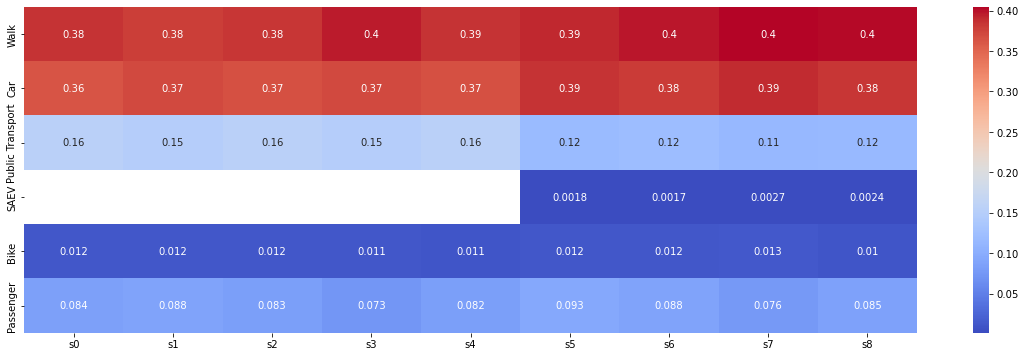

In [489]:
# Your data
df = modes_counts[3]
# Visualization
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))

# Heatmap
sns.heatmap(df, annot=True, cmap="coolwarm")
axes[0].set_title('Heatmap')


plt.show()


In [473]:
df

,Car,Public Transport,SAEV,Bike,Walk.1,Car.1,Public Transport.1,SAEV.1
Walk,,,,,,,,
1,2,3,4,5,6,7,8,9
2,4,6,8,10,12,14,16,18
3,6,9,12,15,18,21,24,27
4,8,12,16,20,24,28,32,36
5,10,15,20,25,30,35,40,45
6,12,18,24,30,36,42,48,54


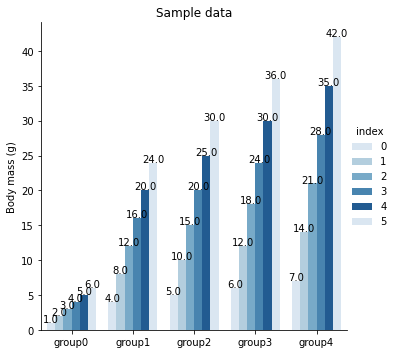

In [461]:

# Define the grouping of scenarios
groups = [['s0'], ['s1', 's5'], ['s2', 's6'], ['s3', 's7'], ['s4', 's8']]

# Create a new dataframe with the grouped scenarios
df_grouped = pd.concat([df[g].mean(axis=1).rename(f'group{i}') for i, g in enumerate(groups)], axis=1)

# Melt the dataframe for plotting
df_melted = df_grouped.reset_index().melt(id_vars='index', value_vars=[f'group{i}' for i in range(len(groups))], var_name='group')

# Set the color palette
palette = sns.color_palette('Blues', n_colors=len(groups))

# Plot the data
g = sns.catplot(data=df_melted, kind='bar', x='group', y='value', hue='index', palette=palette)

# Set the axis labels and title
g.set(xlabel='', ylabel='Body mass (g)', title='Sample data')

# Add the values to the bars
for i, p in enumerate(g.ax.patches):
    value = p.get_height()
    g.ax.text(p.get_x() + p.get_width() / 2, value + 0.1, f'{value:.1f}', ha='center')

# Show the plot
plt.show()


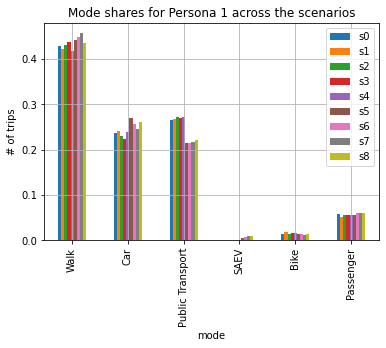

In [436]:
modes_counts[1].plot(kind="bar", grid=True, title="Mode shares for Persona 1 across the scenarios", xlabel="mode", ylabel="# of trips")
plt.show()

In [128]:
modes_counts = pd.DataFrame(index=list(personas), columns=modes)

In [189]:
df = pd.read_csv(f'data/raw/outputs/s1/eqasim_trips.csv', sep=",")
df.head()

,person_id,person_trip_id,origin_x,origin_y,destination_x,destination_y,departure_time,travel_time,vehicle_distance,routed_distance,mode,preceding_purpose,following_purpose,returning,euclidean_distance,origin_scope,destination_scope,trip_scope
0,12511926,0,641108.700579,6.873578e+06,641108.700579,6.873578e+06,12770.0,0.0,0.000000,0.000000,car,work,work,False,0.000000,inside,NaN,inside
1,8313605,0,648728.798361,6.859017e+06,648728.798361,6.859017e+06,12928.0,0.0,0.000000,0.000000,car,work,work,False,0.000000,inside,NaN,inside
2,10862023,0,650968.329732,6.867114e+06,650968.329732,6.867114e+06,13047.0,0.0,0.000000,0.000000,car,work,work,False,0.000000,inside,NaN,inside
3,9736851,0,652708.660403,6.871129e+06,652788.257469,6.868998e+06,12703.0,409.0,4652.653952,4652.653952,car,home,work,False,2132.876592,inside,NaN,inside
4,1109709,0,647386.621908,6.862550e+06,648836.524797,6.862713e+06,12947.0,207.0,1812.746103,1812.746103,car,home,work,False,1459.015753,inside,NaN,inside


In [129]:
for p in personas:
    df = trips_dfs["s0"][trips_dfs["s0"]["persona"]==p]
    modes_counts.loc[p] = df["mode"].value_counts()
modes_counts.head()

,walk,car,pt,bike,car_passenger
1,5290,2917,3277,168,707
2,8776,6672,4105,444,1688
3,9802,9248,3971,307,2143
4,5565,4789,2246,125,1047
5,6743,3926,4613,259,930


In [195]:
data

{('s0',
  'eqasim_trips.csv'):         person_id  person_trip_id       origin_x      origin_y  destination_x  \
 0         3927147               0  605885.157595  6.876584e+06  605885.157595   
 1         2532319               0  664326.598113  6.862903e+06  664326.598113   
 2        11230911               0  652077.353792  6.881310e+06  652077.353792   
 3         4387344               0  634504.435321  6.866522e+06  635049.606643   
 4         2226942               0  664009.486262  6.825190e+06  664009.486262   
 ...           ...             ...            ...           ...            ...   
 412770    8494137               4  657531.671130  6.863953e+06  665653.141184   
 412771     650809               3  648372.733322  6.845121e+06  653620.335439   
 412772    2414982              14  639844.972212  6.865496e+06  713491.992526   
 412773    5014227               3  650987.400719  6.855648e+06  623061.893561   
 412774    1168839               7  660638.946212  6.868264e+06  655

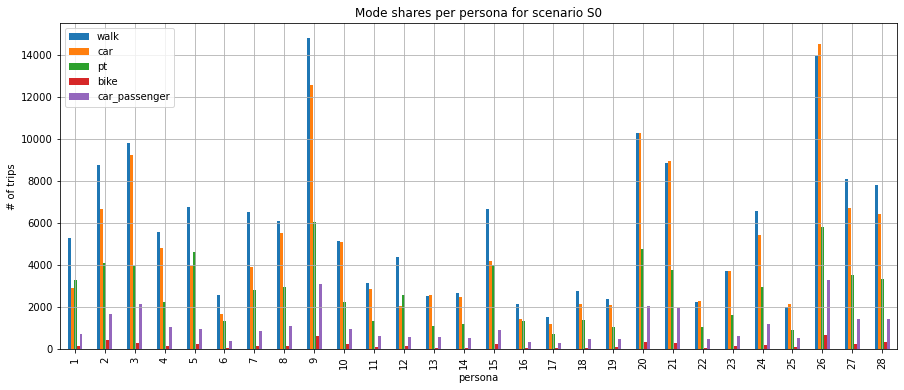

In [130]:
modes_counts.plot(kind="bar", grid=True, figsize=(15,6), ylabel="# of trips", xlabel="persona", title="Mode shares per persona for scenario S0")
plt.show()

In [138]:
modes_shares =  pd.DataFrame(index=list(personas), columns=modes)
for p in personas:
    df = trips_dfs["s0"][trips_dfs["s0"]["persona"]==p]
    modes_shares.loc[p] = df["mode"].value_counts() / len(df)
modes_shares.head()

,walk,car,pt,bike,car_passenger
1,0.428028,0.236022,0.265151,0.013593,0.057205
2,0.404704,0.307678,0.189301,0.020475,0.077842
3,0.38483,0.36308,0.155903,0.012053,0.084135
4,0.404081,0.347735,0.163085,0.009076,0.076024
5,0.409386,0.238358,0.280068,0.015725,0.056463


In [240]:
trips_dfs['s1']

,person_id,person_trip_id,origin_x,origin_y,destination_x,destination_y,departure_time,travel_time,vehicle_distance,routed_distance,mode,preceding_purpose,following_purpose,returning,euclidean_distance,origin_scope,destination_scope,trip_scope,persona
0,12511926,0,641108.700579,6.873578e+06,641108.700579,6.873578e+06,12770.0,0.0,0.000000,0.000000,car,work,work,False,0.000000,inside,NaN,inside,6
1,12511926,1,641108.700579,6.873578e+06,647273.283357,6.873062e+06,23570.0,1887.0,9630.852156,9630.852156,car,work,home,True,6186.168637,inside,NaN,inside,6
2,12511926,2,647273.283357,6.873062e+06,646993.314555,6.858257e+06,34370.0,4346.0,20695.633908,22104.547882,pt,home,other,False,14807.469640,inside,NaN,inside,6
3,12511926,3,646993.314555,6.858257e+06,647273.283357,6.873062e+06,41570.0,4122.0,21377.347962,22799.024387,pt,other,home,True,14807.469640,inside,NaN,inside,6
4,12511926,4,647273.283357,6.873062e+06,660936.718887,6.870064e+06,59570.0,2391.0,24026.543327,24026.543327,car,home,shop,False,13988.469130,inside,NaN,inside,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457759,4380385,3,599424.108565,6.866642e+06,591864.786342,6.871013e+06,96268.0,892.0,0.000000,12692.633162,car_passenger,other,home,True,8731.987456,inside,NaN,inside,21
457760,4380385,4,591864.786342,6.871013e+06,590902.391107,6.870955e+06,97160.0,193.0,1739.477931,1739.477931,car,home,shop,False,964.126331,inside,NaN,inside,21
457761,4380385,5,590902.391107,6.870955e+06,591864.786342,6.871013e+06,97353.0,153.0,1608.876724,1608.876724,car,shop,home,True,964.126331,inside,NaN,inside,21
457762,3099197,0,685385.765691,6.795255e+06,677616.776065,6.825532e+06,61459.0,33854.0,0.000000,40624.985080,walk,home,work,False,31257.854172,inside,NaN,inside,23


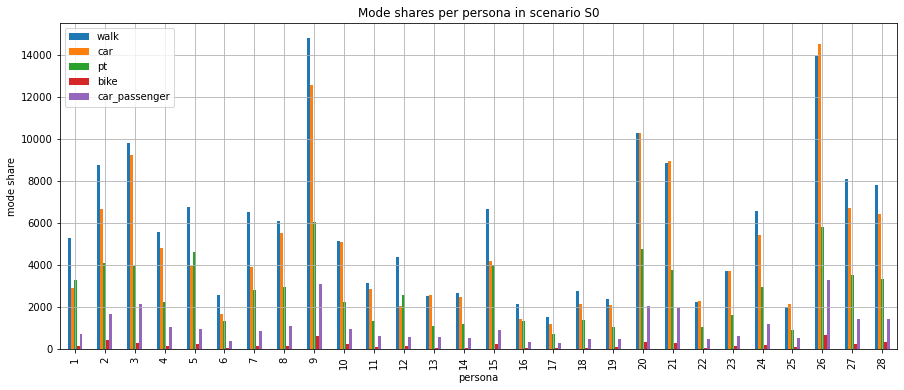

In [132]:
modes_counts.plot(kind="bar", grid=True, figsize=(15,6), title="Mode shares per persona in scenario S0", xlabel="persona", ylabel="mode share")
plt.show()

In [147]:
trips_dfs['s5']['mode'].unique()


array(['walk', 'car', 'drt', 'car_passenger', 'bike'], dtype=object)

In [136]:
modes_counts = pd.DataFrame(index=scenarios, columns=modes)
for s in scenarios:
    modes_counts.loc[s] = trips_dfs[s]["mode"].value_counts()
modes_counts

,walk,car,pt,bike,car_passenger
s0,162910,137609,75938,5756,30562
s1,180907,150515,85674,6237,34431
s2,177710,151316,84143,6069,33821
s3,157481,135476,73966,5272,28911
s4,185106,154801,88720,6474,35724
s5,230052.0,144380.0,NaN,5578.0,32777.0
s6,225637.0,145586.0,NaN,5330.0,32126.0
s7,199915.0,129968.0,NaN,4587.0,27529.0
s8,236189.0,148565.0,NaN,5731.0,33985.0


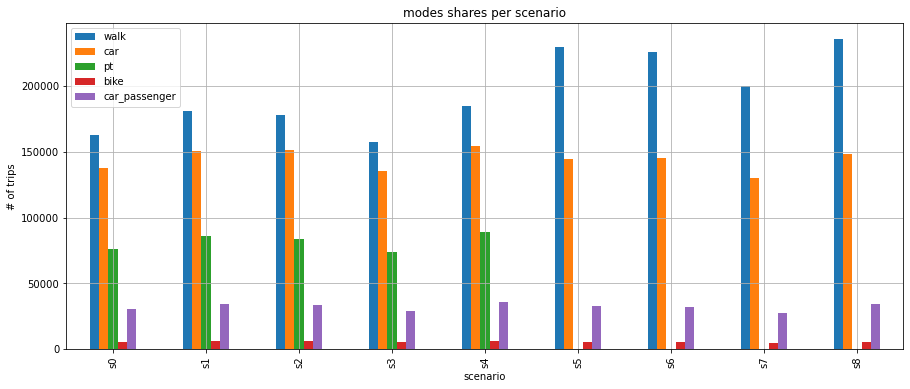

In [134]:
modes_counts.plot(kind="bar", title="modes shares per scenario", xlabel="scenario", ylabel="# of trips", figsize=(15,6), grid=True)
plt.show()

In [174]:
modes_counts_normalised = modes_counts

In [175]:
modes_counts_normalised.iloc[1] = modes_counts_normalised.iloc[1] - modes_counts_normalised.iloc[0]
modes_counts_normalised.iloc[2] = modes_counts_normalised.iloc[2] - modes_counts_normalised.iloc[0] 
modes_counts_normalised.iloc[3] = modes_counts_normalised.iloc[3] - modes_counts_normalised.iloc[0]
modes_counts_normalised.iloc[4] = modes_counts_normalised.iloc[4] - modes_counts_normalised.iloc[0] 

In [176]:
modes_counts_normalised.drop(index=modes_counts_normalised.index[0], axis=0, inplace=True)

In [177]:
modes_counts_normalised

,walk,car,pt,bike,car_passenger
s1,17987,11519,8681,703,3760
s2,14752,12928,7030,519,3232
s3,-4913,-2463,-2465,-499,-1683
s4,22540,16385,11355,750,5098


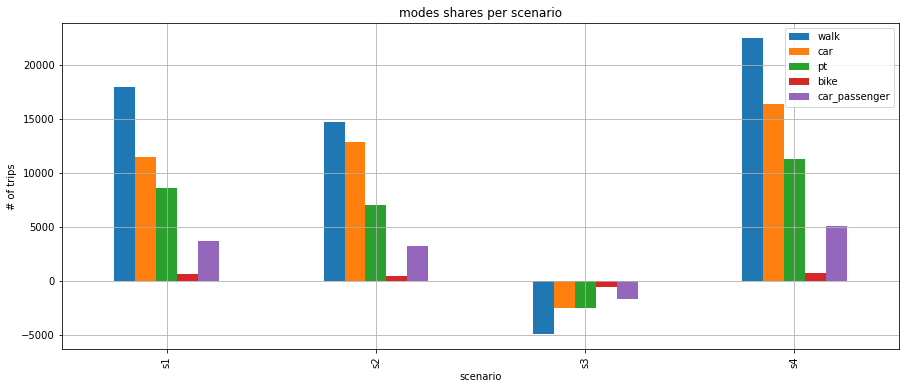

In [178]:
modes_counts_normalised.plot(kind="bar", title="modes shares per scenario", xlabel="scenario", ylabel="# of trips", figsize=(15,6), grid=True)
plt.show()

In [125]:
trips_dfs["s0"].head()

,person_id,person_trip_id,origin_x,origin_y,destination_x,destination_y,departure_time,travel_time,vehicle_distance,routed_distance,mode,preceding_purpose,following_purpose,returning,euclidean_distance,origin_scope,destination_scope,trip_scope,persona
0,3927147,0,605885.157595,6.876584e+06,605885.157595,6.876584e+06,12757.0,0.0,0.000000,0.000000,walk,work,work,False,0.000000,inside,NaN,inside,28
1,3927147,1,605885.157595,6.876584e+06,606622.636756,6.876086e+06,23557.0,924.0,0.000000,1109.117392,walk,work,home,True,889.806959,inside,NaN,inside,28
2,3927147,2,606622.636756,6.876086e+06,626584.588054,6.883330e+06,34357.0,3059.0,30428.780217,30428.780217,car,home,other,False,21235.642001,inside,NaN,inside,28
3,3927147,3,626584.588054,6.883330e+06,606622.636756,6.876086e+06,41557.0,3412.0,31087.939869,31087.939869,car,other,home,True,21235.642001,inside,NaN,inside,28
4,3927147,4,606622.636756,6.876086e+06,607313.103725,6.872396e+06,59557.0,1678.0,4292.708788,4292.708788,car,home,shop,False,3754.043172,inside,NaN,inside,28


In [76]:
trips_counts = pd.DataFrame(index=list(personas), columns=scenarios)
for s in scenarios:
    trips_counts[s] = trips_dfs[s]["persona"].value_counts()
trips_counts.head()

,s0,s1,s2,s3,s4
1,12321,24024,22207,17854,23119.0
2,21558,17856,15543,4722,23823.0
3,25241,17226,22973,13312,25324.0
4,13655,9583,8362,7503,11299.0
5,16271,20742,14858,13141,15964.0


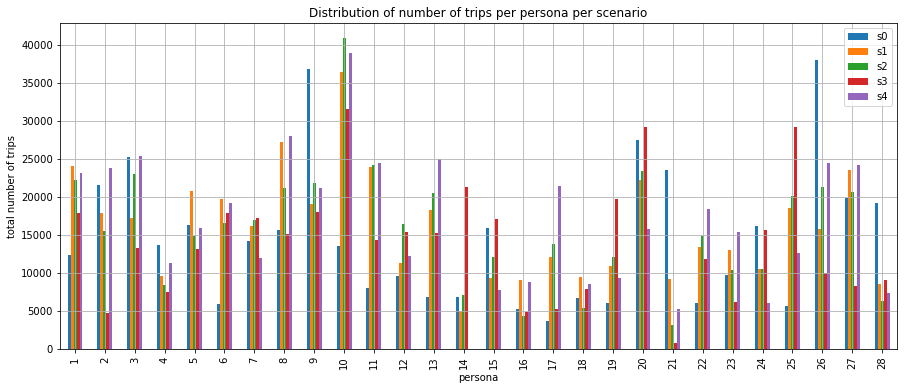

In [77]:
trips_counts.plot(kind="bar", figsize=(15,6), grid=True, title="Distribution of number of trips per persona per scenario", xlabel="persona", ylabel="total number of trips")
plt.show()

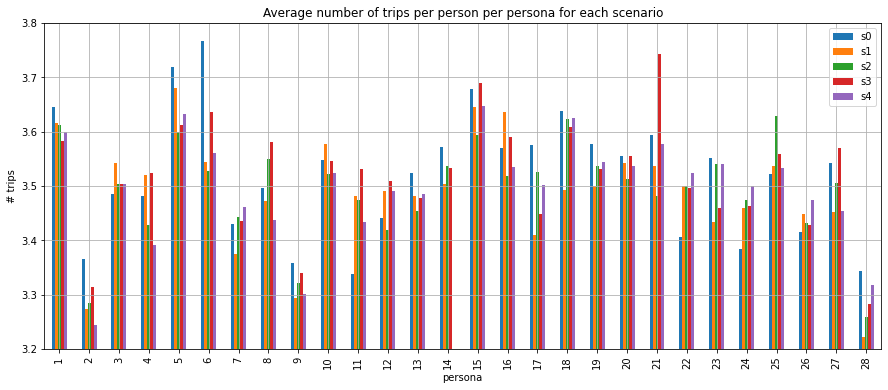

In [185]:
total_to_per_persona(trips_counts, personas_counts, scenarios, personas).plot(kind="bar", figsize=(15,6), grid=True, title="Average number of trips per person per persona for each scenario", xlabel="persona", ylabel="# trips")
plt.ylim([3.2, 3.8])
plt.show()

In [81]:
travel_times = pd.DataFrame(index=list(personas), columns=scenarios)
travel_times.head()

,s0,s1,s2,s3,s4
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN


In [82]:
for s in scenarios:
    for p in personas:
        travel_times.loc[p][s] = trips_dfs[s][trips_dfs[s]["persona"]==p]["travel_time"].sum() / 3600

In [83]:
travel_times.head()

,s0,s1,s2,s3,s4
1,6490.103889,13093.281944,12337.728056,9200.669444,13255.315278
2,12358.875556,10061.195556,9322.214722,2458.505833,13991.742222
3,15622.919167,11116.825278,14662.318333,8113.482778,16074.879167
4,8215.426111,5909.2825,5070.391944,4524.560556,7246.203889
5,9552.74,12435.125278,8873.358056,7634.846111,9908.744722


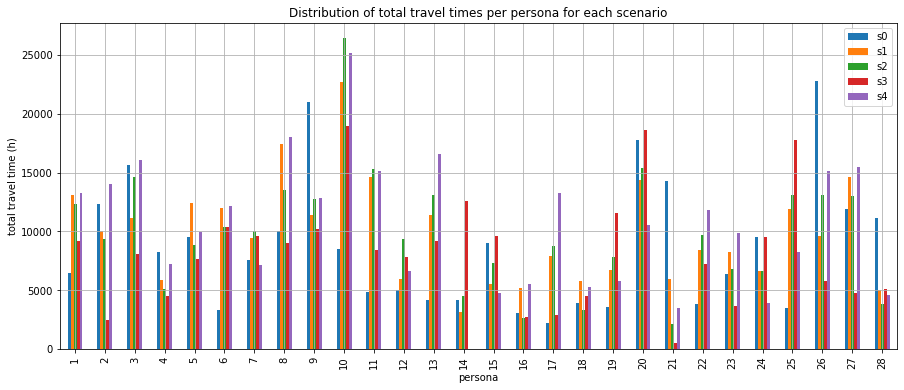

In [84]:
travel_times.plot(kind="bar", figsize=(15,6), xlabel="persona", ylabel="total travel time (h)", grid=True, title="Distribution of total travel times per persona for each scenario")
plt.show()

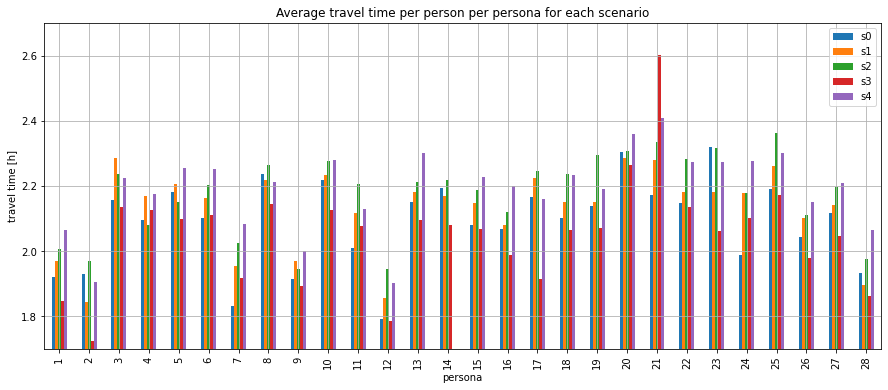

In [182]:
total_to_per_persona(travel_times, personas_counts, scenarios, personas).plot(kind="bar",
    figsize=(15,6), grid=True,
    title="Average travel time per person per persona for each scenario",
    xlabel="persona", ylabel="travel time [h]")
plt.ylim([1.7, 2.7])
plt.show()

In [93]:
# legs_paths = {"s0":"E:\\repos\\eqasim-java-cleaned\\legs_s0.csv",
#              "s1":"E:\\repos\\eqasim-java-cleaned\\legs_s1.csv",
#              "s2":"E:\\repos\\eqasim-java-cleaned\\legs_s2.csv",
#              "s3":"E:\\repos\\eqasim-java-cleaned\\legs_s3.csv",
#              "s4":"E:\\repos\\eqasim-java-cleaned\\legs_s4.csv"}
legs_paths = {s: path.join(scenarios_outputs[s], "legs.csv") for s in scenarios}
legs_dfs = dict()
for s in scenarios:
    base_legs = pd.read_csv(legs_paths[s], sep=",")
    clustered_legs = base_legs.merge(persons[s][["person_id", "persona"]], on="person_id", how="inner")
    assert len(base_legs) == len(clustered_legs)
    legs_dfs[s] = clustered_legs

In [94]:
legs_dfs["s0"].head()

,Unnamed: 0,person_id,person_trip_id,leg_index,origin_x,origin_y,destination_x,destination_y,departure_time,travel_time,vehicle_distance,routed_distance,mode,euclidean_distance,persona
0,0,3927147,0,0,605885.157595,6.876584e+06,605885.157595,6.876584e+06,12757.0,0.0,0.000000,0.000000,walk,0.000000,28
1,10304,3927147,1,1,605885.157595,6.876584e+06,606622.636756,6.876086e+06,23557.0,924.0,0.000000,1109.117392,walk,889.806959,28
2,166200,3927147,2,2,606622.636756,6.876086e+06,632624.482358,6.867061e+06,34357.0,2764.0,31261.047193,31261.047193,car,27523.352085,28
3,228679,3927147,3,3,632624.482358,6.867061e+06,606622.636756,6.876086e+06,41557.0,2173.0,31629.733169,31629.733169,car,27523.352085,28
4,408024,3927147,4,4,606622.636756,6.876086e+06,601358.090381,6.877858e+06,59557.0,517.0,6621.651388,6621.651388,car,5554.922888,28


In [96]:
pt_legs_dfs = dict()
for s in scenarios:
    base_legs = pd.read_csv(path.join(scenarios_outputs[s], "eqasim_pt.csv"), sep=",")
    pt_legs_dfs[s] = base_legs

In [97]:
pt_legs_dfs["s0"].head()

,Unnamed: 0,person_id,person_trip_id,leg_index,access_stop_id,egress_stop_id,transit_line_id,transit_route_id,access_area_id,egress_area_id,transit_mode
0,0,1271150,0,1,StopPoint:59:7376180.link:48983,StopPoint:59:4036986.link:585002,100987783:N14,116443104-1_183707,StopArea:59631,StopArea:59566,bus
1,1,944660,0,1,StopPoint:8743315:800:N141.link:554571,StopPoint:8759118:800:N141.link:481468,800:N141,117422208-1_22633,StopArea:59435,StopArea:8711300,bus
2,2,10502677,0,1,StopPoint:59:5150728.link:506840,StopPoint:59:6783435.link:148459,100987753:N51,116441814-1_188349,StopArea:59912,StopArea:8727114,bus
3,3,6365356,0,1,StopPoint:59:4016027.link:456736,StopPoint:59:7991680.link:574981,100987782:N15,116428873-1_183751,StopArea:59:4016026,StopArea:8738400,bus
4,4,7081458,0,1,StopPoint:59:7275530.link:239769,StopPoint:59:4459238.link:646069,100987752:N52,116959084-1_188375,StopArea:59:7275530,StopArea:59443,bus


### Environmental calculation

Repeat the process below for energy demand, using energy intensity by mode

In [99]:
total_c02 = pd.DataFrame(index=list(personas), columns=scenarios)
total_c02.head()

,s0,s1,s2,s3,s4
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN


In [100]:
modes_c02 = pd.DataFrame([["car", 0.2], 
                          ["car_passenger", 0.0], 
                          ["walk", 0],
                          ["bus", 0.1],
                          ["rail", 0.007],
                          ["subway", 0.003],
                          ["tram", 0.003]], columns=["mode", "unitary_c02"])
modes_c02.head()

,mode,unitary_c02
0,car,0.200
1,car_passenger,0.000
2,walk,0.000
3,bus,0.100
4,rail,0.007


In [101]:
for s in scenarios:
    df = legs_dfs[s][legs_dfs[s]["mode"]!="pt"]
    df = df.merge(modes_c02, on="mode")
    df["total_c02"] = (df["routed_distance"]/1000) * df["unitary_c02"]
    for p in personas:
        total_c02.loc[p][s] = df[df["persona"]==p]["total_c02"].sum()

In [102]:
total_c02

,s0,s1,s2,s3,s4
1,5238.880982,10147.33894,9499.488516,7635.763346,10022.913053
2,12699.923506,10078.016361,8452.686886,2589.770387,13103.330795
3,17066.371992,12499.924093,15794.312032,9242.013971,17441.514557
4,9016.093016,6245.837825,5424.315168,4709.034331,7570.122901
5,6960.048232,9117.113673,6675.937469,6087.265315,6948.215886
6,2992.360432,10774.426619,9513.182927,10212.288952,10139.757963
7,7000.177447,8534.180151,8496.52686,9209.253245,6167.125827
8,9750.866166,16293.572046,13233.60544,9381.616961,16785.355714
9,22851.695278,11822.078512,13200.526789,11440.089641,11966.404269
10,9673.417672,24597.732362,28404.011125,22437.696463,28002.120003


In [103]:
for s in scenarios:
    df = pt_legs_dfs[s]
    total_pt_legs = len(df)
    df = df.merge(legs_dfs[s], on=["person_id", "person_trip_id", "leg_index"])
    assert(len(df[df["mode"]=="pt"]) == total_pt_legs)
    df["mode"] = df["transit_mode"]
    df = df.merge(modes_c02, on="mode", how="inner")
    df["total_c02"] = (df["routed_distance"]/1000) * df["unitary_c02"]
    for p in personas:
        total_c02.loc[p][s] += df[df["persona"]==p]["total_c02"].sum()

In [35]:
total_c02

,s0,s1,s2,s3,s4
1,6040.367022,11867.28508,11121.254358,8904.554163,11777.588283
2,14239.868901,11310.678841,9563.503101,2909.643884,14808.136274
3,18825.8341,13541.512085,17447.779062,10106.562516,19239.762585
4,9946.114422,6935.941222,6024.712207,5214.201424,8363.757913
5,8105.686579,10568.367996,7766.189051,6986.052301,8011.950391
6,3421.420053,12225.984708,10680.702534,11443.776401,11572.532361
7,7925.16582,9579.140403,9678.137577,10379.028586,7011.387982
8,10980.768332,18431.219298,14808.040393,10430.371347,18966.530564
9,25349.369671,13112.874953,14597.977955,12691.260974,13488.339553
10,10552.480272,27195.316924,31562.199486,24596.782941,30792.932405


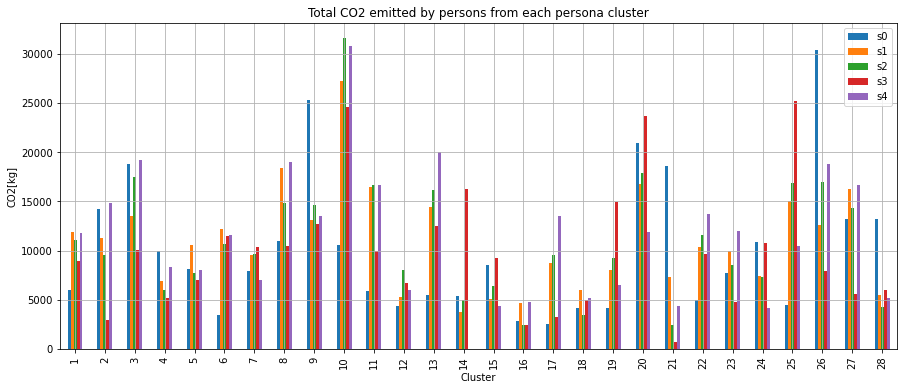

In [104]:
total_c02.plot(kind="bar", figsize=(15,6), grid=True, xlabel="Cluster", ylabel="CO2[kg]", title="Total CO2 emitted by persons from each persona cluster")
plt.show()

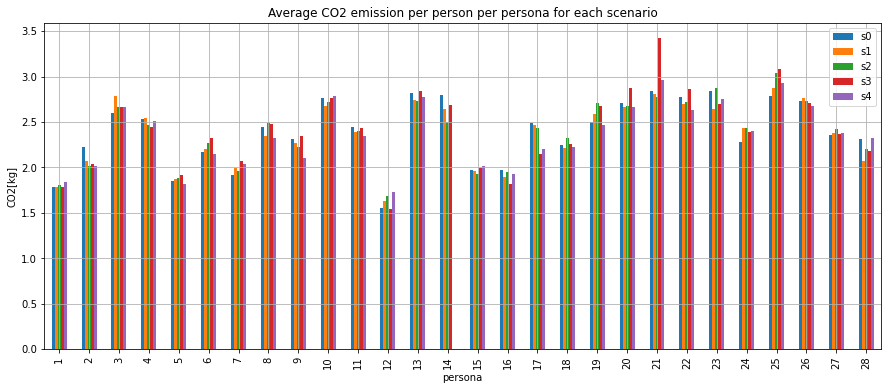

In [105]:
total_to_per_persona(total_c02, personas_counts, scenarios, personas).plot(kind="bar", figsize=(15,6), grid=True, title="Average CO2 emission per person per persona for each scenario", xlabel="persona", ylabel="CO2[kg]")
plt.show()

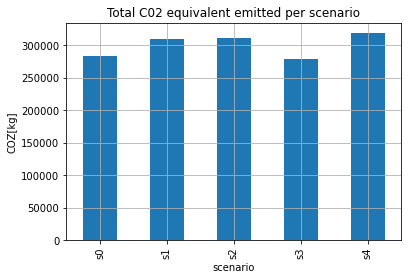

In [106]:
total_c02.sum().plot(kind="bar", grid=True, title="Total C02 equivalent emitted per scenario", xlabel="scenario", ylabel="COZ[kg]")
plt.show()